In [1]:
import pandas as pd

df = pd.read_csv("sentiment_dataset.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.info()
df.isnull().sum()
df.duplicated().sum()
##these codes are used to understand the data. df.info() was used to understand the data and data types. df.isnull().sum() is used to identify total missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


np.int64(0)

In [3]:
# Remove unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Fill missing values in text/categorical columns
for col in df.select_dtypes(include="object"):
    df[col].fillna("unknown", inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Standardize text data
df["Text"] = df["Text"].str.lower().str.strip()
df["Sentiment"] = df["Sentiment"].str.lower().str.strip()
df["Platform"] = df["Platform"].str.lower().str.strip()
df["Country"] = df["Country"].str.lower().str.strip()

# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


C:\Users\hp\AppData\Local\Temp\ipykernel_1116\3505779782.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("unknown", inplace=True)


In [4]:
df.to_csv("cleaned_sentiment_data.csv", index=False)


In [5]:
df.to_csv("cleaned_sentiment_data.csv", index=False)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_sentiment_data.csv")
df.head()


ModuleNotFoundError: No module named 'matplotlib'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_sentiment_data.csv")
df.head()


,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying a beautiful day at the park!,positive,2023-01-15 12:30:00,User123,twitter,#Nature #Park,15.0,30.0,usa,2023,1,15,12
1,1,traffic was terrible this morning.,negative,2023-01-15 08:45:00,CommuterX,twitter,#Traffic #Morning,5.0,10.0,canada,2023,1,15,8
2,2,just finished an amazing workout! 💪,positive,2023-01-15 15:45:00,FitnessFan,instagram,#Fitness #Workout,20.0,40.0,usa,2023,1,15,15
3,3,excited about the upcoming weekend getaway!,positive,2023-01-15 18:20:00,AdventureX,facebook,#Travel #Adventure,8.0,15.0,uk,2023,1,15,18
4,4,trying out a new recipe for dinner tonight.,neutral,2023-01-15 19:55:00,ChefCook,instagram,#Cooking #Food,12.0,25.0,australia,2023,1,15,19


In [2]:
df.describe()


,Unnamed: 0.1,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


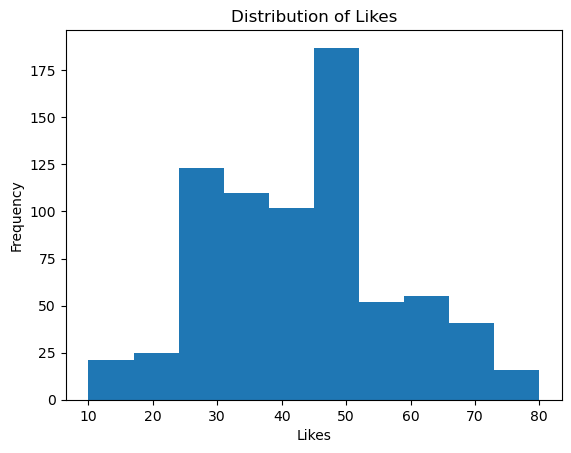

In [3]:
plt.hist(df["Likes"], bins=10)
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.title("Distribution of Likes")
plt.show()


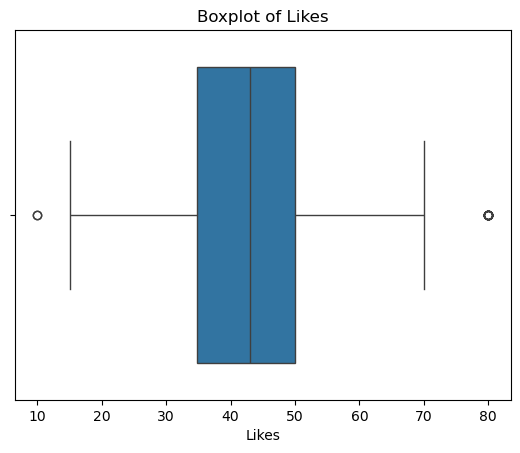

In [4]:
sns.boxplot(x=df["Likes"])
plt.title("Boxplot of Likes")
plt.show()


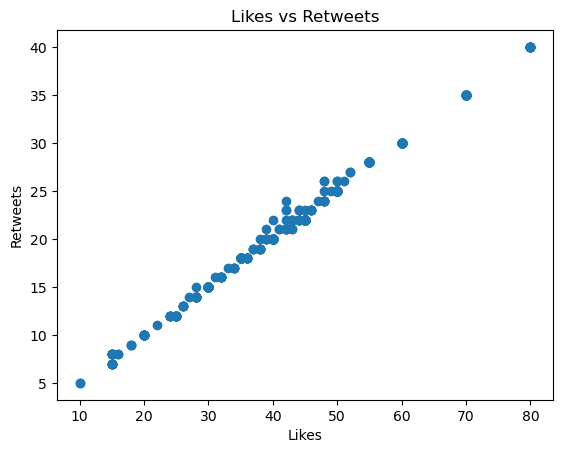

In [5]:
plt.scatter(df["Likes"], df["Retweets"])
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.title("Likes vs Retweets")
plt.show()


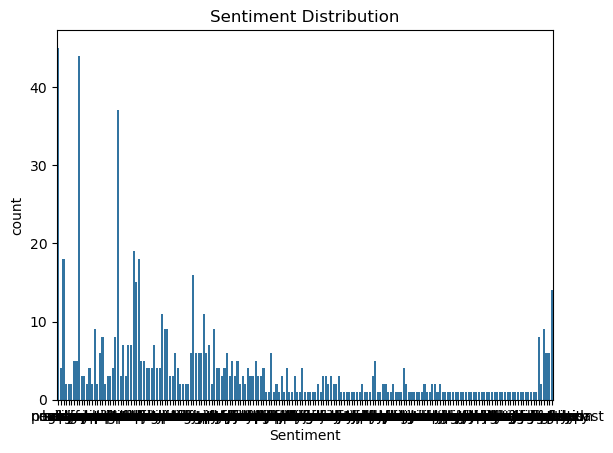

In [6]:
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()


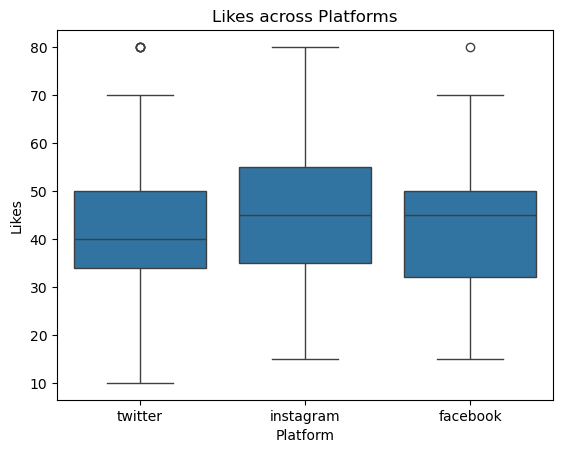

In [7]:
sns.boxplot(x="Platform", y="Likes", data=df)
plt.title("Likes across Platforms")
plt.show()


In [8]:
corr = df[["Likes", "Retweets"]].corr()
corr


,Likes,Retweets
Likes,1.000000,0.998482
Retweets,0.998482,1.000000


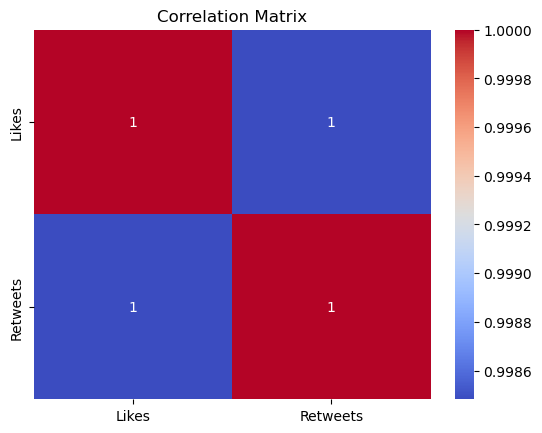

In [9]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_sentiment_data.csv")


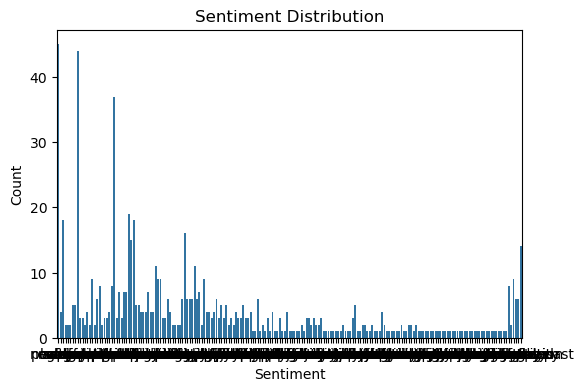

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("sentiment_bar_plot.png")
plt.show()


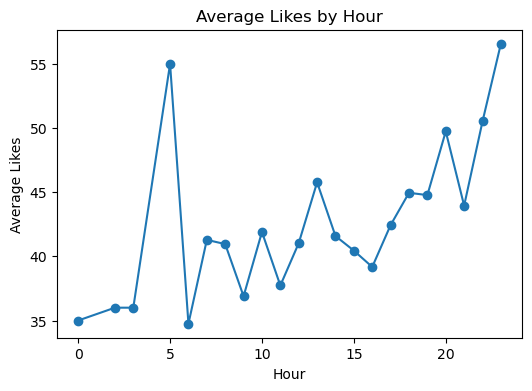

In [12]:
hourly_likes = df.groupby("Hour")["Likes"].mean()

plt.figure(figsize=(6,4))
plt.plot(hourly_likes.index, hourly_likes.values, marker="o")
plt.title("Average Likes by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes")
plt.savefig("likes_by_hour_line_chart.png")
plt.show()


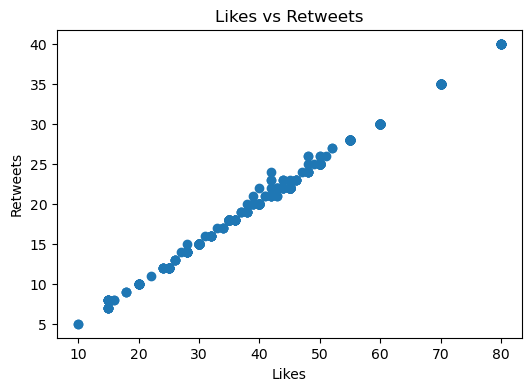

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df["Likes"], df["Retweets"])
plt.title("Likes vs Retweets")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.savefig("likes_vs_retweets_scatter.png")
plt.show()
